## :  Previous Script Available

In [4]:
import numpy as np
import matplotlib 
import scipy
import sklearn
import statsmodels
import seaborn
import pydot
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.ar_model import AutoReg 

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from scipy import stats
from scipy.stats.stats import mode
from scipy.stats import uniform
from sklearn.model_selection import (train_test_split, RepeatedKFold,RandomizedSearchCV)
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

import pickle

In [5]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt

## : Início do processamento

In [6]:
mat_contents = sio.loadmat('data3SS2009.mat')

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape 
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [7]:
np.where(y==10)

(array([450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499], dtype=int64),)

In [8]:
y_bin_damaged = np.zeros((1,850))
y_bin_damaged[:,450:] = y_bin_damaged[:,450:] +1
y_bin_damaged

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

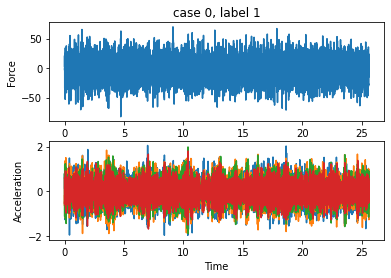

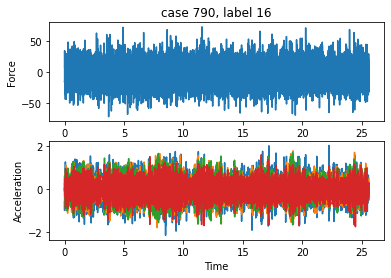

In [9]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [10]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))

X

print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)

matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)


## Feature extraction AR

In [11]:
FeatAR = []
na = 29
for i in range(0,850):
  ARmodel2 = AutoReg(Ch2[:,i],na).fit()
  ARmodel3 = AutoReg(Ch3[:,i],na).fit()
  ARmodel4 = AutoReg(Ch4[:,i],na).fit()
  ARmodel5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([ARmodel2.params,ARmodel3.params, ARmodel4.params,ARmodel5.params])
  FeatAR.append(ARparams)
FeatAR = np.array(FeatAR)


In [12]:
FeatAR.shape

(850, 120)

## : feature extraction PCA 


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_pca = pca.fit_transform(FeatAR)

print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (850, 6) 
 X_PCA: [[ 7.66136505 -1.41780663  0.80665171  0.89625556 -1.19463583 -0.13840328]
 [ 6.8869037  -1.70474591  0.96095314 -0.0090899  -1.74358116 -0.49638477]
 [ 6.94763838 -1.5554447   0.94936492  0.13319058 -0.83617666 -0.46298613]
 ...
 [-5.24160818 -1.38243332  1.19297854 -2.02374849 -0.32984218  0.81221121]
 [-5.06151016 -1.37825724  1.20604602 -0.0969439   0.34497989  0.90045879]
 [-5.24563384 -1.14354112  1.67658163  0.0533145   0.28827159  0.88529276]]


In [14]:
print(pca.explained_variance_ratio_ , pca.singular_values_)

[0.64699238 0.12653811 0.09021831 0.0510888  0.02622314 0.01953216] [131.93541573  58.34753064  49.26734492  37.0744467   26.56159486
  22.92381596]


## : Scale Feature

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando AR
X1_max_min = MinMaxScaler(feature_range=(-1,1))
X1_train = X1_max_min.fit_transform(FeatAR)
X1_train

# Normalizando PCA
X2_max_min = MinMaxScaler(feature_range=(-1,1))
X2_train = X2_max_min.fit_transform(X_pca)
X2_train

print('Confirmando a normalização:','\n X1 máximo normalizado: ', X1_train.max(), '\n X1 minimo normalizado: ',X1_train.min(),'\n X2 máximo normalizado: ', X2_train.max(), '\n X2 minimo normalizado: ',X2_train.min())


Confirmando a normalização: 
 X1 máximo normalizado:  1.0000000000000018 
 X1 minimo normalizado:  -1.0 
 X2 máximo normalizado:  1.0000000000000002 
 X2 minimo normalizado:  -1.0


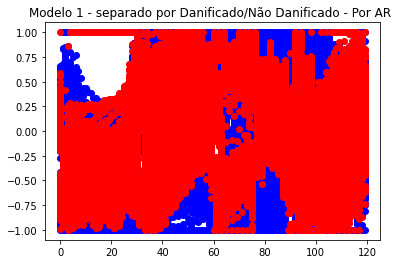

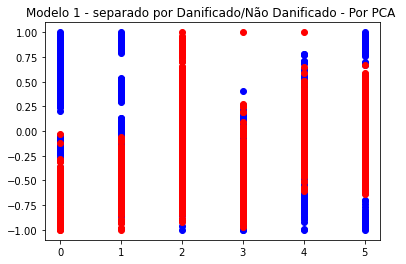

In [16]:
# Plotando os resultados comparando o X1 com X2 

# Dividi o problema em duas soluções:  - Não danificado em AZUL e Danificado em vermelho


Y1 = np.array(range(0,120))
Y2 = np.array(range(0,6))

# Plot do AR
for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'red'
    plt.title('Modelo 1 - separado por Danificado/Não Danificado - Por AR ')
  plt.scatter(Y1,X1_train[case,:], color = color_name)
plt.show()

# Plot do PCA
for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'red'
    plt.title('Modelo 1 - separado por Danificado/Não Danificado - Por PCA ')
  plt.scatter(Y2,X2_train[case,:], color = color_name)
plt.show()
  

Ao plotar o modelo AR é possível observar que a grande quantidade de dados dificulas a leitura e interpretação do problema. Quando ao gráfico com PCA, a redução de variaveis facilita a interpretação dos resultados neste caso.

## : SOFTMAX

In [17]:


softmax1 = LogisticRegression(random_state=0,max_iter= 2000).fit(X1_train,y)
softmax2 = LogisticRegression(random_state=0,max_iter= 2000).fit(X2_train,y)


predict_1 = softmax1.predict(X1_train)
proba_1 = softmax1.predict_proba(X1_train)
score_1 = softmax1.score(X1_train,y)                           

predict_2 = softmax2.predict(X2_train)
proba_2 = softmax2.predict_proba(X2_train)
score_2 = softmax2.score(X2_train,y)  

print('score_1', score_1,'\n score_2', score_2)

score_1 0.9988235294117647 
 score_2 0.908235294117647


## : SVC

In [18]:
# AR

svc_linear_1 = svm.SVC(C=1.0, kernel='linear').fit(X1_train,y)
svc_poly_1 = svm.SVC(C=1.0, kernel='poly').fit(X1_train,y)
svc_rbf_1 = svm.SVC(C=1.0, kernel='rbf').fit(X1_train,y)
svc_sig_1 = svm.SVC(C=1.0, kernel='sigmoid').fit(X1_train,y)

linear_1_predict = svc_linear_1.predict(X1_train)
poly_1_predict = svc_poly_1.predict(X1_train)
rbf_1_predict = svc_rbf_1.predict(X1_train)
sig_1_predict = svc_sig_1.predict(X1_train)

svm_linear_1 = svc_linear_1.score(X1_train,y)
svm_ploy_1 = svc_poly_1.score(X1_train,y) 
svm_rbf_1 = svc_rbf_1.score(X1_train,y) 
svm_sig_1 = svc_sig_1.score(X1_train,y)

# PCA

svc_linear_2 = svm.SVC(C=1.0, kernel='linear').fit(X2_train,y)
svc_poly_2 = svm.SVC(C=1.0, kernel='poly').fit(X2_train,y)
svc_rbf_2 = svm.SVC(C=1.0, kernel='rbf').fit(X2_train,y)
svc_sig_2 = svm.SVC(C=1.0, kernel='sigmoid').fit(X2_train,y)

linear_2_predict = svc_linear_2.predict(X2_train)
poly_2_predict = svc_poly_2.predict(X2_train)
rbf_2_predict = svc_rbf_2.predict(X2_train)
sig_2_predict = svc_sig_2.predict(X2_train)

svm_linear_2 = svc_linear_2.score(X2_train,y)
svm_poly_2 = svc_poly_2.score(X2_train,y) 
svm_rbf_2 = svc_rbf_2.score(X2_train,y) 
svm_sig_2 = svc_sig_2.score(X2_train,y) 

print('svm_linear_1', svm_linear_1, '\n svm_ploy_1', svm_ploy_1, '\n svm_rbf_1', svm_rbf_1, '\n svm_sig_1', svm_sig_1)
print('\n svm_linear_2', svm_linear_2, '\n svm_poly_2', svm_poly_2, '\n svm_rbf_2', svm_rbf_2, '\n svm_sig_2', svm_sig_2)

svm_linear_1 1.0 
 svm_ploy_1 0.9988235294117647 
 svm_rbf_1 0.9976470588235294 
 svm_sig_1 0.9847058823529412

 svm_linear_2 0.9364705882352942 
 svm_poly_2 0.9341176470588235 
 svm_rbf_2 0.9364705882352942 
 svm_sig_2 0.8505882352941176


## : kNN

In [19]:
#AR
knn_5_1 = KNeighborsClassifier(n_neighbors=5).fit(X1_train,y)
knn_10_1 = KNeighborsClassifier(n_neighbors=10).fit(X1_train,y)
knn_15_1 = KNeighborsClassifier(n_neighbors=15).fit(X1_train,y)
knn_20_1 = KNeighborsClassifier(n_neighbors=20).fit(X1_train,y)

knn_5_ar = knn_5_1.score(X1_train,y)
knn_10_ar = knn_10_1.score(X1_train,y) 
knn_15_ar = knn_15_1.score(X1_train,y) 
knn_20_ar = knn_20_1.score(X1_train,y)


#PCA
knn_5_2 = KNeighborsClassifier(n_neighbors=5).fit(X2_train,y)
knn_10_2 = KNeighborsClassifier(n_neighbors=10).fit(X2_train,y)
knn_15_2 = KNeighborsClassifier(n_neighbors=15).fit(X2_train,y)
knn_20_2 = KNeighborsClassifier(n_neighbors=20).fit(X2_train,y)

knn_5_pca = knn_5_2.score(X2_train,y)
knn_10_pca = knn_10_2.score(X2_train,y) 
knn_15_pca = knn_15_2.score(X2_train,y) 
knn_20_pca = knn_20_2.score(X2_train,y)

print(' knn_5_ar', knn_5_ar, '\n knn_10_ar', knn_10_ar, '\n knn_15_ar', knn_15_ar, '\n knn_20_ar', knn_20_ar)
print('\n knn_5_pca', knn_5_pca, '\n knn_10_pca', knn_10_pca, '\n knn_15_pca', knn_15_pca, '\n knn_20_pca', knn_20_pca)

 knn_5_ar 0.9941176470588236 
 knn_10_ar 0.9894117647058823 
 knn_15_ar 0.9870588235294118 
 knn_20_ar 0.9870588235294118

 knn_5_pca 0.9376470588235294 
 knn_10_pca 0.9376470588235294 
 knn_15_pca 0.9294117647058824 
 knn_20_pca 0.9235294117647059


## : Creates List of Dictionaries

In [20]:
param_grid = []

param_grid.append(
    [
     {
      "LGR__C": stats.loguniform(1e-2,1e2),
     }
    ]
)


param_grid.append(
    [
     {
      "SVC__C": stats.loguniform(1e-2,1e2),
      "SVC__kernel": ["linear","poly","rbf","sigmoid"],   
     }
    ]
)



param_grid.append(
    [
     {
      "KNN__n_neighbors": stats.randint(2,100),
      "KNN__weights": ["uniform","distance"],
     }
    ]
)


models = []

models.append(("LGR", LogisticRegression(max_iter=1000)))
models.append(("SVC",SVC()))
models.append(("KNN", KNeighborsRegressor()))

In [21]:
N_REPS=50
N_SPLITS=5
N_ITERS=100
models_list=['LGR','SVC','KNN']

## : Hyperparameter

In [22]:
from sklearn.model_selection import train_test_split

# AR

random_search_AR={}
param_grids_AR={}
yh_test_AR={}
acc1={}
for k in range(0,3):
  X_train_AR, X_test_AR, y_train_AR, y_test_AR = train_test_split(X1_train,y, 
                                                                  test_size=0.6, 
                                                                  random_state=42)
  rkf = RepeatedKFold(n_splits=N_SPLITS,n_repeats=N_REPS,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_AR[models_list[k]] = param_grid[k]
  random_search_AR[models_list[k]] = RandomizedSearchCV(clf,verbose=1, 
                                                        scoring="neg_mean_squared_error",
                                                        param_distributions=param_grids_AR[models_list[k]],
                                                        n_iter=N_ITERS,
                                                        n_jobs=-1,
                                                        cv=rkf,
                                                        random_state=42)
  random_search_AR[models_list[k]].fit(X_train_AR,y_train_AR)

  yh_test_AR[models_list[k]] = random_search_AR[models_list[k]].predict(X_test_AR)
  acc1[models_list[k]] = random_search_AR[models_list[k]].score(X_test_AR, y_test_AR)
  print('Accuracy Score: ',models_list[k], ' AR: ', acc1[models_list[k]])

# PCA

random_search_PCA={}
param_grids_PCA={}
yh_test_PCA={}
acc2={}
for k in range(0,3):

  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X2_train,y, 
                                                                      test_size=0.6, 
                                                                      random_state=42)
  rkf = RepeatedKFold(n_splits=N_SPLITS,n_repeats=N_REPS,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_PCA[models_list[k]] = param_grid[k]
  random_search_PCA[models_list[k]] = RandomizedSearchCV(clf,verbose=1, 
                                                         scoring="neg_mean_squared_error",
                                                         param_distributions=param_grids_PCA[models_list[k]],
                                                         n_iter=N_ITERS,
                                                         n_jobs=-1,
                                                         cv=rkf,
                                                         random_state=42)
  random_search_PCA[models_list[k]].fit(X_train_PCA,y_train_PCA)  
  yh_test_PCA[models_list[k]] = random_search_PCA[models_list[k]].predict(X_test_PCA)
  acc2[models_list[k]] = random_search_PCA[models_list[k]].score(X_test_PCA, y_test_PCA)
  print('Accuracy Score: ',models_list[k], ' PCA: ', acc1[models_list[k]])

Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  LGR  AR:  -0.0
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  SVC  AR:  -0.00196078431372549
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  KNN  AR:  -0.14368662085453332
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  LGR  PCA:  -0.0
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  SVC  PCA:  -0.00196078431372549
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  KNN  PCA:  -0.14368662085453332


In [23]:
results_dict = {
    'Results_AR':random_search_AR,
    'yh_AR':yh_test_AR,
    'Results_PCA':random_search_PCA,
    'yh_PCA':yh_test_PCA,
}

In [24]:
a_file = open("TakeHome4_results_n_reps"+str(N_REPS)+".pkl", "wb")
pickle.dump(results_dict, a_file)
a_file.close()